In [26]:
# LOAD DATA 

import pandas as pd

df_klaim = pd.read_csv(r"D:\DSC ITB\3JutaCash\dataset\Data_Klaim.csv")
df_polis = pd.read_csv(r"D:\DSC ITB\3JutaCash\dataset\Data_Polis.csv")

df_merge = df_klaim.merge(df_polis, on='Nomor Polis', how='left')
df_merge.shape

(4627, 18)

In [27]:
df_merge.info()
df_merge.describe()
df_merge.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4627 entries, 0 to 4626
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Claim ID                       4627 non-null   object 
 1   Nomor Polis                    4627 non-null   object 
 2   Reimburse/Cashless             4627 non-null   object 
 3   Inpatient/Outpatient           4590 non-null   object 
 4   ICD Diagnosis                  4621 non-null   object 
 5   ICD Description                4621 non-null   object 
 6   Status Klaim                   4627 non-null   object 
 7   Tanggal Pembayaran Klaim       4590 non-null   object 
 8   Tanggal Pasien Masuk RS        4627 non-null   object 
 9   Tanggal Pasien Keluar RS       4627 non-null   object 
 10  Nominal Klaim Yang Disetujui   4627 non-null   float64
 11  Nominal Biaya RS Yang Terjadi  4627 non-null   float64
 12  Lokasi RS                      4620 non-null   o

,Claim ID,Nomor Polis,Reimburse/Cashless,Inpatient/Outpatient,ICD Diagnosis,ICD Description,Status Klaim,Tanggal Pembayaran Klaim,Tanggal Pasien Masuk RS,Tanggal Pasien Keluar RS,Nominal Klaim Yang Disetujui,Nominal Biaya RS Yang Terjadi,Lokasi RS,Plan Code,Gender,Tanggal Lahir,Tanggal Efektif Polis,Domisili
0,C-0001-M,POL-0176,R,OP,C50,MALIGNANT NEOPLASM OF BREAST,PAID,2024-07-08,2024-05-27,2024-05-27,28093653.0,6.143948e+06,Singapore,M-001,F,19670220,20150109,JAKARTA
1,C-0002-M,POL-3288,R,OP,C34,MALIGNANT NEOPLASM OF BRONCHUS AND LUNG,PAID,2024-08-06,2024-07-15,2024-07-15,80987278.0,8.230952e+07,Malaysia,M-002,M,19560925,20120619,YOGYAKARTA
2,C-0003-M,POL-1786,R,OP,C18.9,"MALIGNANT NEOPLASM, COLON, UNSPECIFIED",PAID,2024-10-17,2024-05-16,2024-05-16,183047130.0,1.928599e+08,Singapore,M-002,F,19591021,20150316,SURABAYA
3,C-0004-M,POL-1786,R,OP,C34,MALIGNANT NEOPLASM OF BRONCHUS AND LUNG,PAID,2024-09-03,2024-07-18,2024-07-18,191424386.0,1.914244e+08,Singapore,M-002,F,19591021,20150316,SURABAYA
4,C-0005-M,POL-2778,R,OP,C50,MALIGNANT NEOPLASM OF BREAST,PAID,NaN,2024-06-06,2024-06-06,138936357.0,1.389364e+08,Singapore,M-002,F,19680906,20140624,JAKARTA


## Konversi tanggal jadi date time

In [28]:
df_merge['Tanggal Pasien Masuk RS'] = pd.to_datetime(df_merge['Tanggal Pasien Masuk RS'])
df_merge['Tanggal Pasien Keluar RS'] = pd.to_datetime(df_merge['Tanggal Pasien Keluar RS'])
df_merge['Tanggal Lahir'] = pd.to_datetime(df_merge['Tanggal Lahir'], format='%Y%m%d')

## FE

In [29]:
#Umur
df_merge['Umur'] = (pd.Timestamp.today() - df_merge['Tanggal Lahir']).dt.days // 365

In [30]:
#Lama Rawat

df_merge['Lama Rawat'] = (
    df_merge['Tanggal Pasien Keluar RS'] -
    df_merge['Tanggal Pasien Masuk RS']
).dt.days

In [31]:
# Tahun Klaim
df_merge['Tahun Klaim'] = df_merge['Tanggal Pasien Masuk RS'].dt.year

## Analisis Missing Value

In [32]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4627 entries, 0 to 4626
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Claim ID                       4627 non-null   object        
 1   Nomor Polis                    4627 non-null   object        
 2   Reimburse/Cashless             4627 non-null   object        
 3   Inpatient/Outpatient           4590 non-null   object        
 4   ICD Diagnosis                  4621 non-null   object        
 5   ICD Description                4621 non-null   object        
 6   Status Klaim                   4627 non-null   object        
 7   Tanggal Pembayaran Klaim       4590 non-null   object        
 8   Tanggal Pasien Masuk RS        4627 non-null   datetime64[ns]
 9   Tanggal Pasien Keluar RS       4627 non-null   datetime64[ns]
 10  Nominal Klaim Yang Disetujui   4627 non-null   float64       
 11  Nominal Biaya RS 

In [34]:
missing = df_merge.isnull().sum()
missing_percent = (missing / len(df_merge)) * 100
pd.DataFrame({'Missing Count': missing, 'Missing %': missing_percent})

,Missing Count,Missing %
Claim ID,0,0.000000
Nomor Polis,0,0.000000
Reimburse/Cashless,0,0.000000
Inpatient/Outpatient,37,0.799654
ICD Diagnosis,6,0.129674
ICD Description,6,0.129674
Status Klaim,0,0.000000
Tanggal Pembayaran Klaim,37,0.799654
Tanggal Pasien Masuk RS,0,0.000000
Tanggal Pasien Keluar RS,0,0.000000


In [36]:
df_merge.duplicated().sum()

0

## Deskriptif Numerik

In [10]:
df_merge.describe()

,Tanggal Pasien Masuk RS,Tanggal Pasien Keluar RS,Nominal Klaim Yang Disetujui,Nominal Biaya RS Yang Terjadi,Tanggal Lahir,Tanggal Efektif Polis,Umur,Lama Rawat,Tahun Klaim
count,4627,4627,4.627000e+03,4.627000e+03,4627,4.627000e+03,4627.000000,4627.000000,4627.000000
mean,2024-10-10 18:15:28.982061824,2024-10-12 00:35:47.395720704,5.502892e+07,5.994940e+07,1965-06-06 10:55:44.024205760,2.014470e+07,60.269073,1.264102,2024.353793
min,2024-01-01 00:00:00,2024-01-02 00:00:00,0.000000e+00,0.000000e+00,1933-10-10 00:00:00,2.011121e+07,8.000000,0.000000,2024.000000
25%,2024-05-16 12:00:00,2024-05-17 00:00:00,2.274009e+06,2.720210e+06,1955-11-02 00:00:00,2.013052e+07,53.000000,0.000000,2024.000000
50%,2024-10-11 00:00:00,2024-10-13 00:00:00,1.446790e+07,1.587100e+07,1964-11-08 00:00:00,2.014123e+07,61.000000,0.000000,2024.000000
75%,2025-03-03 00:00:00,2025-03-04 00:00:00,5.107209e+07,5.423067e+07,1973-01-26 00:00:00,2.016033e+07,70.000000,1.000000,2025.000000
max,2025-07-31 00:00:00,2025-08-09 00:00:00,2.197500e+09,3.892810e+09,2017-06-09 00:00:00,2.018013e+07,92.000000,54.000000,2025.000000
std,NaN,NaN,1.319527e+08,1.597838e+08,NaN,1.726925e+04,12.565333,2.930572,0.478198


## Distribusi Nominal Klaim

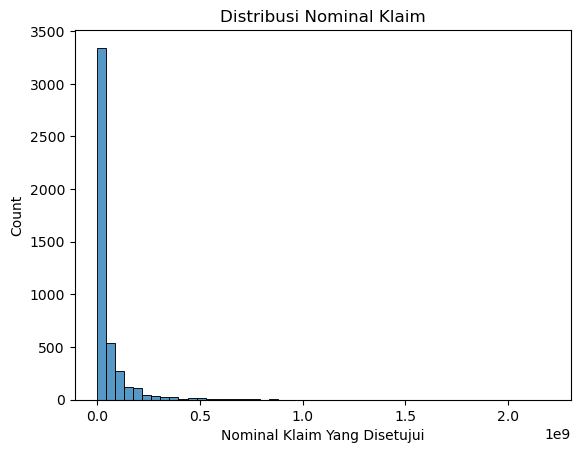

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df_merge['Nominal Klaim Yang Disetujui'], bins=50)
plt.title("Distribusi Nominal Klaim")
plt.show()

## Korelasi

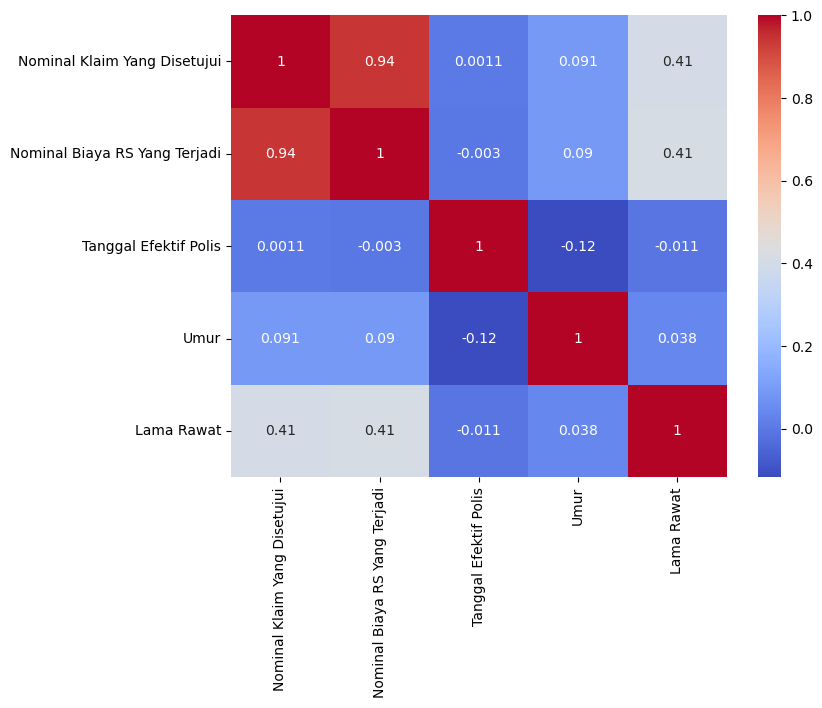

In [12]:
df_numeric = df_merge.select_dtypes(include=['int64','float64'])

plt.figure(figsize=(8,6))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.show()

## Analisis Tren Tahunan dengan periode seimbang

In [13]:
df_merge['Bulan'] = df_merge['Tanggal Pasien Masuk RS'].dt.month

df_compare = df_merge[df_merge['Bulan'] <= 9]

df_compare.groupby('Tahun Klaim')['Nominal Klaim Yang Disetujui'] \
          .agg(['count','mean','median','max'])

,count,mean,median,max
Tahun Klaim,,,,
2024,2208,5.659291e+07,14512899.50,1.813035e+09
2025,1637,5.573216e+07,14654010.95,2.197500e+09


## Perbandingan Severity

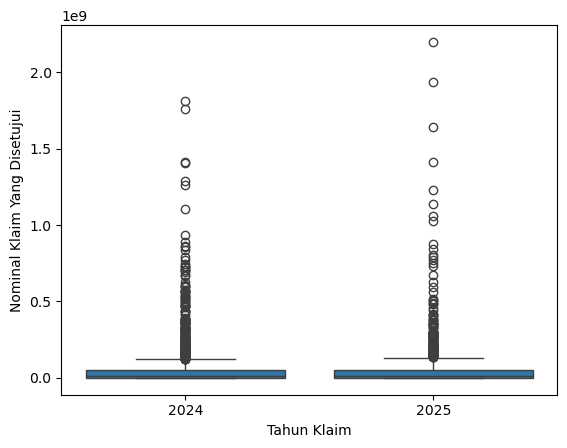

In [14]:
sns.boxplot(x='Tahun Klaim',
            y='Nominal Klaim Yang Disetujui',
            data=df_compare)
plt.show()

# Other 

In [15]:
threshold_95 = df_merge['Nominal Klaim Yang Disetujui'].quantile(0.95)

df_merge['Extreme_Claim'] = (
    df_merge['Nominal Klaim Yang Disetujui'] > threshold_95
)

In [16]:
df_merge['Extreme_Claim'].mean()

0.050140479792522154

In [17]:
df_merge.groupby('Extreme_Claim')['Lama Rawat'].mean()

Extreme_Claim
False    1.049829
True     5.323276
Name: Lama Rawat, dtype: float64

<Axes: xlabel='Extreme_Claim', ylabel='Lama Rawat'>

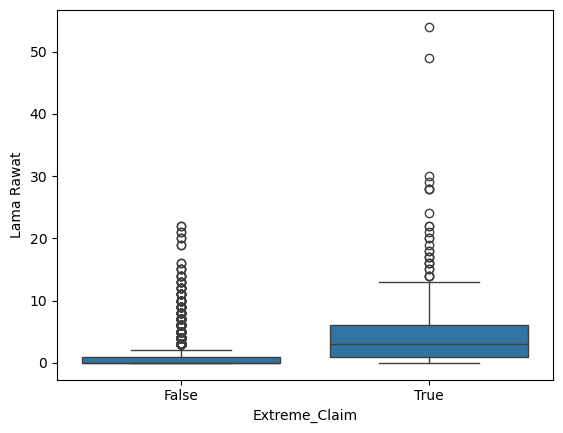

In [22]:
sns.boxplot(x='Extreme_Claim',
            y='Lama Rawat',
            data=df_merge)

In [18]:
pd.crosstab(df_merge['Extreme_Claim'],
            df_merge['Inpatient/Outpatient'],
            normalize='index')

Inpatient/Outpatient,IP,ODC,ODS,OP
Extreme_Claim,,,,
False,0.473382,0.062643,0.025241,0.438733
True,0.840517,0.034483,0.004310,0.120690


In [19]:
pd.crosstab(df_merge['Extreme_Claim'],
            df_merge['Plan Code'],
            normalize='index')

Plan Code,M-001,M-002,M-003
Extreme_Claim,,,
False,0.151536,0.650512,0.197952
True,0.163793,0.728448,0.107759


In [20]:
df_merge[df_merge['Extreme_Claim'] == True]['ICD Diagnosis'].value_counts().head(10)

ICD Diagnosis
C50       15
I25.1     12
I73.9      9
C34        7
C90.0      6
I25        6
I48        6
M17.9      5
C20        5
M48.82     4
Name: count, dtype: int64

In [21]:
df_merge.groupby('Extreme_Claim')['Umur'].mean()

Extreme_Claim
False    60.046416
True     64.487069
Name: Umur, dtype: float64

<Axes: xlabel='Extreme_Claim', ylabel='Umur'>

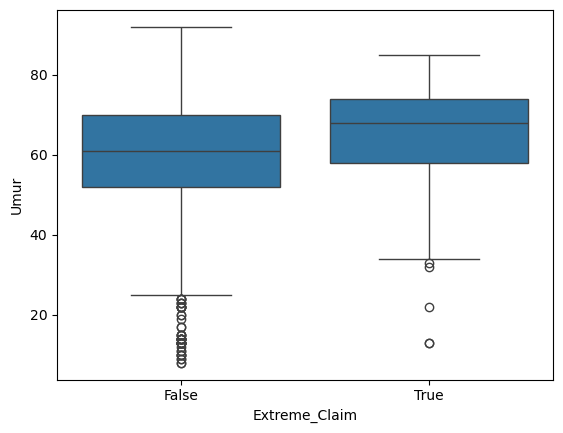

In [23]:
sns.boxplot(x='Extreme_Claim',
            y='Umur',
            data=df_merge)

In [38]:
df_merge['Nominal Klaim Yang Disetujui'].describe()

count    4.627000e+03
mean     5.502892e+07
std      1.319527e+08
min      0.000000e+00
25%      2.274009e+06
50%      1.446790e+07
75%      5.107209e+07
max      2.197500e+09
Name: Nominal Klaim Yang Disetujui, dtype: float64

<Axes: xlabel='Nominal Klaim Yang Disetujui', ylabel='Count'>

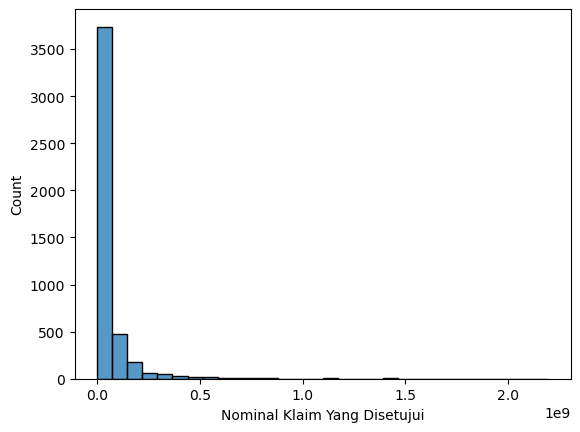

In [39]:
import seaborn as sns
sns.histplot(df_merge['Nominal Klaim Yang Disetujui'], bins=30)

In [40]:
df_merge['Tanggal Lahir'] = pd.to_datetime(df_merge['Tanggal Lahir'], format='%Y%m%d')
df_merge['Umur'] = (pd.Timestamp.today() - df_merge['Tanggal Lahir']).dt.days // 365
df_merge['Umur'].describe()

count    4627.000000
mean       60.269073
std        12.565333
min         8.000000
25%        53.000000
50%        61.000000
75%        70.000000
max        92.000000
Name: Umur, dtype: float64

In [41]:
df_merge['Tanggal Pasien Masuk RS'] = pd.to_datetime(df_merge['Tanggal Pasien Masuk RS'])
df_merge['Tanggal Pasien Keluar RS'] = pd.to_datetime(df_merge['Tanggal Pasien Keluar RS'])

df_merge['Lama Rawat'] = (df_merge['Tanggal Pasien Keluar RS'] - df_merge['Tanggal Pasien Masuk RS']).dt.days
df_merge['Lama Rawat'].describe()

count    4627.000000
mean        1.264102
std         2.930572
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        54.000000
Name: Lama Rawat, dtype: float64

In [42]:
frequency = df_merge.groupby('Nomor Polis')['Claim ID'].count()
frequency.describe()

count    1210.000000
mean        3.823967
std         9.651988
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max       222.000000
Name: Claim ID, dtype: float64

In [43]:
df_merge['Tahun Klaim'] = df_merge['Tanggal Pasien Masuk RS'].dt.year
df_merge['Tahun Klaim'].value_counts()

Tahun Klaim
2024    2990
2025    1637
Name: count, dtype: int64

In [44]:
df_merge.groupby('Tahun Klaim')['Claim ID'].count()

Tahun Klaim
2024    2990
2025    1637
Name: Claim ID, dtype: int64

<Axes: xlabel='Tahun'>

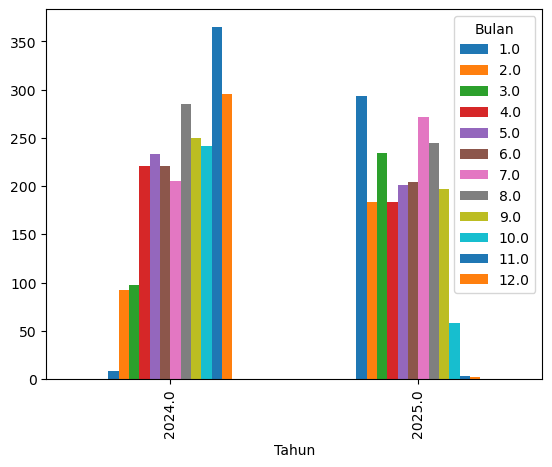

In [52]:
df_merge['Bulan'] = pd.to_datetime(df_merge['Tanggal Pembayaran Klaim']).dt.month
df_merge['Tahun'] = pd.to_datetime(df_merge['Tanggal Pembayaran Klaim']).dt.year

df_merge.groupby(['Tahun','Bulan']).size().unstack().plot(kind='bar')

In [53]:
df_merge.groupby('Tahun')['Nominal Klaim Yang Disetujui'].mean()

Tahun
2024.0    5.022449e+07
2025.0    5.996795e+07
Name: Nominal Klaim Yang Disetujui, dtype: float64

Text(0.5, 1.0, 'Distribusi Nominal Klaim')

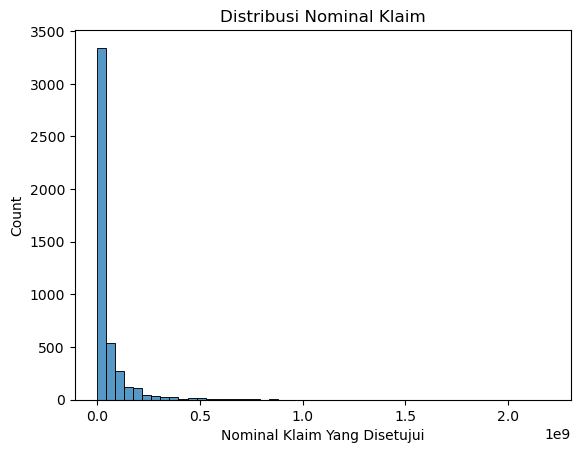

In [45]:
import matplotlib.pyplot as plt

sns.histplot(df_merge['Nominal Klaim Yang Disetujui'], bins=50)
plt.title("Distribusi Nominal Klaim")

<Axes: xlabel='Gender', ylabel='Nominal Klaim Yang Disetujui'>

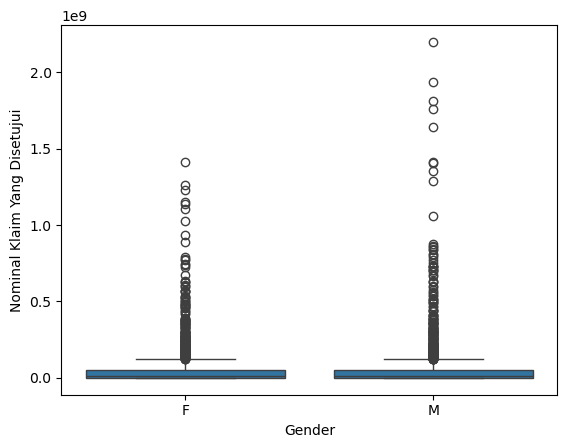

In [46]:
sns.boxplot(x='Gender', 
            y='Nominal Klaim Yang Disetujui', 
            data=df_merge)

<Axes: xlabel='Plan Code'>

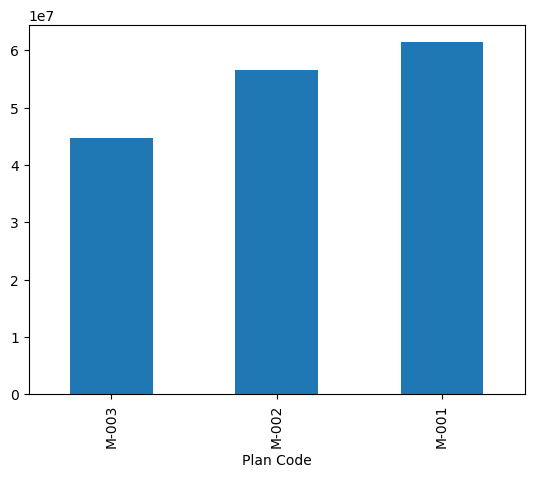

In [47]:
df_merge.groupby('Plan Code')['Nominal Klaim Yang Disetujui'].mean().sort_values().plot(kind='bar')

In [54]:
df_merge.groupby('Tahun Klaim')['Nominal Klaim Yang Disetujui'].agg(['mean','median','max'])

,mean,median,max
Tahun Klaim,,,
2024,5.464391e+07,14354714.00,1.813035e+09
2025,5.573216e+07,14654010.95,2.197500e+09


In [55]:
df_compare = df_merge[df_merge['Bulan'] <= 9]

df_compare.groupby('Tahun Klaim')['Nominal Klaim Yang Disetujui'].agg(['count','mean','median','max'])

,count,mean,median,max
Tahun Klaim,,,,
2024,2068,5.754506e+07,14864550.0,1.813035e+09
2025,1557,5.390969e+07,14096382.0,2.197500e+09


In [56]:
threshold = df_merge['Nominal Klaim Yang Disetujui'].quantile(0.75)

df_merge['High_Claim'] = df_merge['Nominal Klaim Yang Disetujui'] > threshold

df_merge.groupby('Tahun Klaim')['High_Claim'].mean()

Tahun Klaim
2024    0.243478
2025    0.262065
Name: High_Claim, dtype: float64

In [60]:
threshold = df_merge['Nominal Klaim Yang Disetujui'].quantile(0.75)

df_merge['High_Claim'] = df_merge['Nominal Klaim Yang Disetujui'] > threshold

df_compare.groupby('Tahun Klaim')['High_Claim'].mean()

KeyError: 'Column not found: High_Claim'

<Axes: xlabel='Tahun Klaim', ylabel='Nominal Klaim Yang Disetujui'>

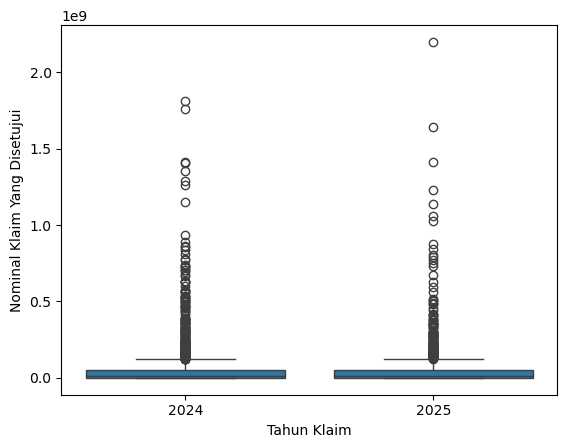

In [61]:
sns.boxplot(x='Tahun Klaim', y='Nominal Klaim Yang Disetujui', data=df_compare)

<Axes: xlabel='Umur', ylabel='Nominal Klaim Yang Disetujui'>

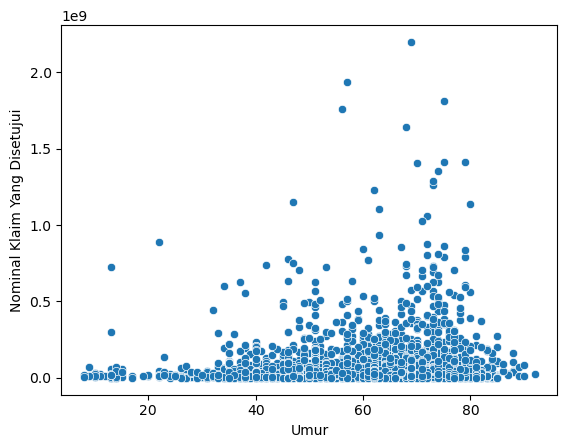

In [48]:
sns.scatterplot(x='Umur', 
                y='Nominal Klaim Yang Disetujui', 
                data=df_merge)

In [49]:
df_numeric = df_merge.select_dtypes(include=['int64','float64'])

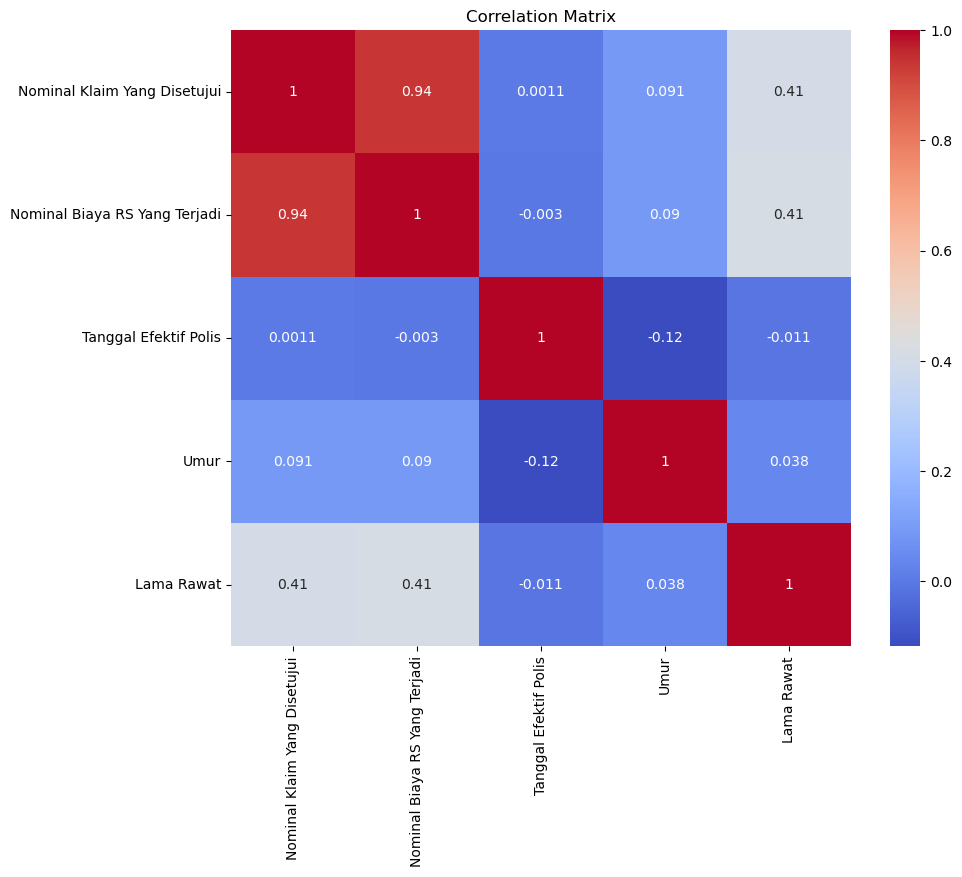

In [50]:

plt.figure(figsize=(10,8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()